## The Alpaca Trading Platform:

Alpaca is a comission-free trading API. Even nicer, you can sign up for a free paper trading account to test out algorithms and strategies, which is what I've done below. 


#### Useful Links: 
API Docs: https://alpaca.markets/docs/api-documentation/api-v2/

API Docs (orders info): https://alpaca.markets/docs/api-documentation/api-v2/orders/
    - includes parameters required for orders

Tutorial Video (what this code is based on): https://alpaca.markets/docs/get-started-with-alpaca/tutorial-videos/

In [1]:
import requests 
import config 
import json 
import matplotlib.pyplot as plt 
import pandas as pd 
from datetime import date 

## Functions to Make Trades

    The functions below will get our account data, create orders using parameters, and show us how much our portfolio has returned as a percent. 
    
    The URLs / API info is the 'service' that connects my code to the Alpaca trading platform and allows us to make trades. 



In [2]:
BASE_URL = 'https://paper-api.alpaca.markets'
ACCOUNT_URL = "{}/v2/account".format(BASE_URL)
ORDERS_URL = "{}/v2/orders".format(BASE_URL)
HEADERS = {'APCA-API-KEY-ID':config.API_KEY,'APCA-API-SECRET-KEY':config.SECRET_KEY}

def get_account():
    r = requests.get(ACCOUNT_URL, headers=HEADERS)
    return json.loads(r.content)
    
def create_order(symbol, qty, side, type, time_in_force): 
    data = {
        "symbol":symbol,
        "qty":qty, 
        "side":side,
        "type":type, 
        "time_in_force":time_in_force
    }
    
    r = requests.post(ORDERS_URL, json=data, headers=HEADERS)
    return json.loads(r.content) 
                      
def get_orders(): 
    r = requests.get(ORDERS_URL, headers=HEADERS)
         
    return json.loads(r.content)

def account_return():
    #100,000 is the starting portfolio amount on 8/13/2020
    ROE = ((100000 / int(get_account()['portfolio_value']))*100) - 100
    print('On {} your portfolio has increased/decreased by'.format(date.today()), ROE, '%')

In [3]:
keys = {'Info' : list(get_account().keys()), 'Values' : list(get_account().values())}
Account_Info = pd.DataFrame(data=keys)

Account_Info[2:]

,Info,Values
2,status,ACTIVE
3,currency,USD
4,buying_power,319978
5,regt_buying_power,120074
6,daytrading_buying_power,319978
7,cash,19978
8,portfolio_value,100096
9,pattern_day_trader,False
10,trading_blocked,False
11,transfers_blocked,False


## First Trades

    Right after submitting the two orders below, by calling the create_order function defined earlier, I took a screenshot of my portfolio. You can see that I now have SPY and AAPL in my portfolio. These orders were executed virtually instantly at the market price. You can specify dozens of other options including limit prices, time in force, parameters for taking profit, and much more. 

In [69]:
#response = create_order("SPY", 100, "buy","market","day")
#response = create_order("AAPL", 100, "buy", "market", "day")
print(response)

{'id': '65add739-cd21-49d6-a6be-c9c203edf1af', 'client_order_id': 'f405ea9a-9caf-4231-b853-b57869928f36', 'created_at': '2020-08-13T16:23:20.847332Z', 'updated_at': '2020-08-13T16:23:20.847332Z', 'submitted_at': '2020-08-13T16:23:20.815078Z', 'filled_at': None, 'expired_at': None, 'canceled_at': None, 'failed_at': None, 'replaced_at': None, 'replaced_by': None, 'replaces': None, 'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415', 'symbol': 'AAPL', 'asset_class': 'us_equity', 'qty': '100', 'filled_qty': '0', 'filled_avg_price': None, 'order_class': '', 'order_type': 'market', 'type': 'market', 'side': 'buy', 'time_in_force': 'day', 'limit_price': None, 'stop_price': None, 'status': 'accepted', 'extended_hours': False, 'legs': None, 'trail_percent': None, 'trail_price': None, 'hwm': None}


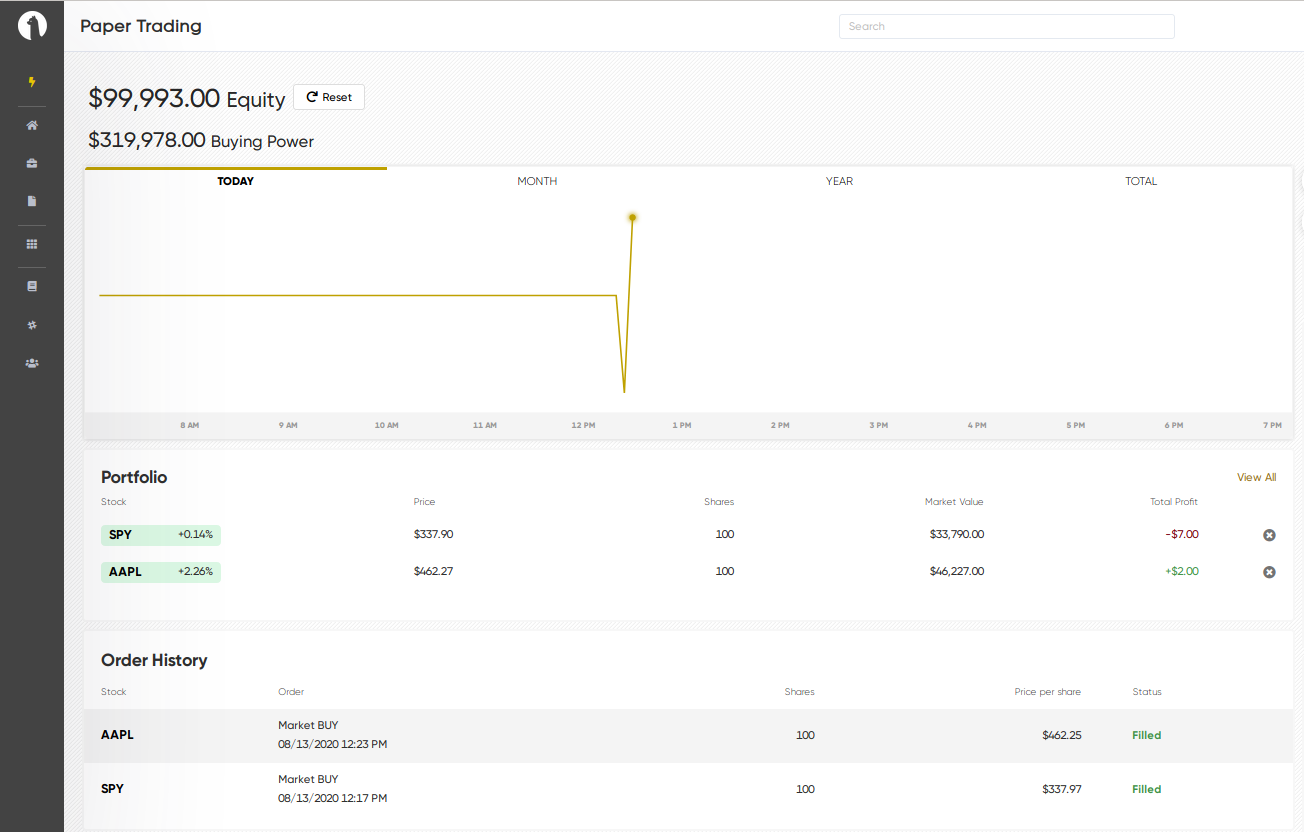

In [4]:
account_return() 

On 2020-08-13 your portfolio has increased/decreased by -0.08392949922065895 %
